In [1]:
# utilities needed for our code
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
# reading the csv file given
df = pd.read_excel("./FlowerData.xlsx")
df.head()

,Petal.Length,Petal.Width,Species,InitialAssignment
0,1.4,0.2,setosa,1
1,1.4,0.2,setosa,1
2,1.3,0.2,setosa,2
3,1.5,0.2,setosa,3
4,1.4,0.2,setosa,2


In [3]:
# we only want the columns with index 0 and 1 as our predictors
x = df.iloc[:, [0,1]].values

In [4]:
# using the K-Means clustering algorithm
flower_kmeans = KMeans(n_clusters=3, init="random", n_init=50)
y_kmeans = flower_kmeans.fit_predict(x)
print(y_kmeans)

# get the centroids
flower_kmeans.cluster_centers_

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0]


array([[5.59583333, 2.0375    ],
       [4.26923077, 1.34230769],
       [1.462     , 0.246     ]])

In [5]:
# getting the objective value 
display(-flower_kmeans.score(x))

31.371358974358976

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

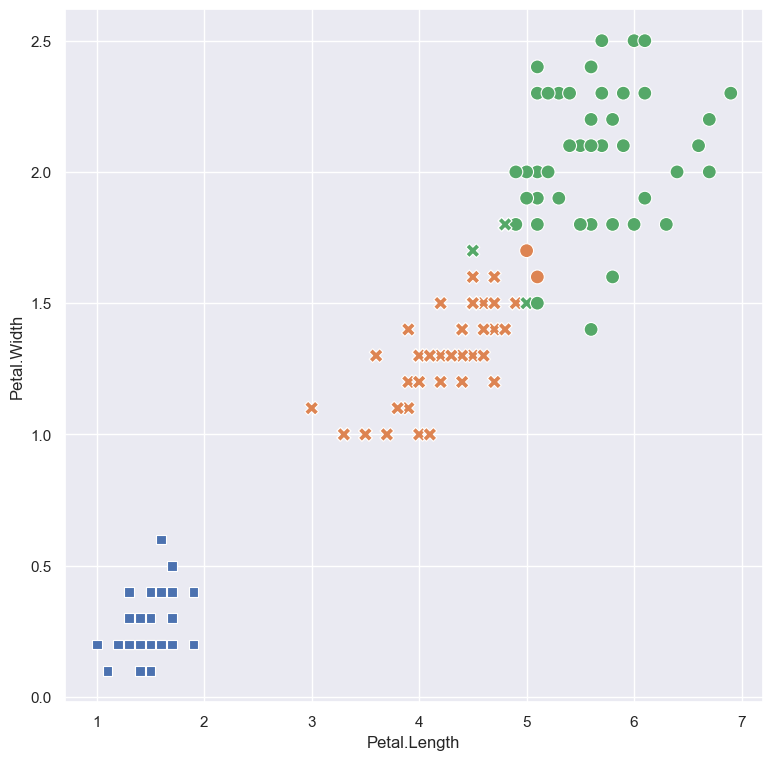

In [6]:
# plotting the graph with our predictions
sns.set(rc={"figure.figsize":(9, 9)}) 
sns.scatterplot(x=df["Petal.Length"],
                y=df["Petal.Width"],
                hue=df["Species"], # the actual data
                style=y_kmeans, # our predictions
                palette="deep",
                legend=None, s=100)

# plotting the centroids of each cluster
sns.scatterplot(flower_kmeans.cluster_centers_[:, 0], flower_kmeans.cluster_centers_[:, 1],
                s=80,color='red')
plt.show()